In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [10]:
df = pd.read_csv("../Data/crude-oil-price.csv")
print(df.head())

                        date  price  percentChange  change
0  1983-06-01 00:00:00+00:00  31.38            NaN     NaN
1  1983-07-01 00:00:00+00:00  32.00          1.976    0.62
2  1983-08-01 00:00:00+00:00  31.59         -1.281   -0.41
3  1983-09-01 00:00:00+00:00  30.36         -3.894   -1.23
4  1983-10-01 00:00:00+00:00  30.37          0.033    0.01


In [5]:
# Verify columns and data types
print(df.columns)
print(df.dtypes)

Index(['date', 'price', 'percentChange', 'change'], dtype='object')
date              object
price            float64
percentChange    float64
change           float64
dtype: object


In [6]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)

In [11]:
summary_stats = df.describe()
print(summary_stats)

            price  percentChange      change
count  494.000000     493.000000  493.000000
mean    46.325888       0.737925    0.105974
std     29.083015      10.512494    4.973496
min     10.420000     -54.245000  -32.830000
25%     20.420000      -5.332000   -1.720000
50%     33.685000       0.929000    0.270000
75%     69.322500       6.377000    2.400000
max    140.000000      88.376000   16.650000


Data Preprocessing

In [13]:
print(df.isnull().sum())

# Impute missing values in 'percentChange' and 'change' columns with 0
df['percentChange'] = df['percentChange'].fillna(0)
df['change'] = df['change'].fillna(0)

date             0
price            0
percentChange    1
change           1
dtype: int64


In [15]:
#  Outliers Detection and Treatment
# Detect outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Identify outliers
outliers = df['price'][(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print('Outliers:', outliers)

# Replace outliers with the upper and lower bounds
df['price'] = np.clip(df['price'], lower_bound, upper_bound)

Outliers: Series([], Name: price, dtype: float64)


In [17]:
# Data Consistency
# Check for duplicate entries and remove them
df.drop_duplicates(inplace=True)

In [19]:
#  Noise Reduction
# Smooth the data using a moving average
df['price_ma'] = df['price'].rolling(window=3).mean()


In [21]:
# Data Integrity
# Verify that dates are in sequence and there are no gaps in the time series
# Check for gaps in the date sequence
df['date'] = pd.to_datetime(df['date']) 
gaps = df['date'].diff() != pd.Timedelta(days=30)
print('Gaps in date sequence:', gaps.sum())

Gaps in date sequence: 329


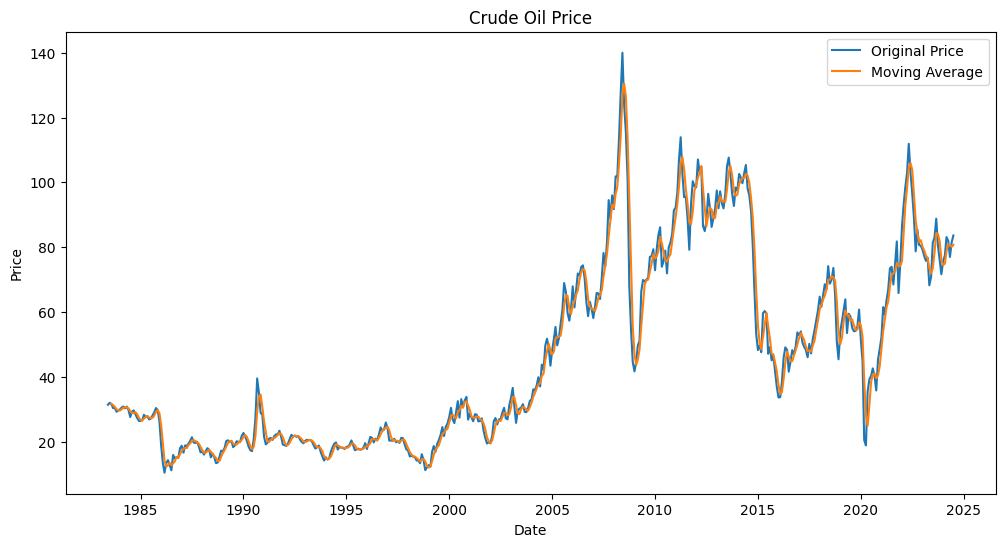

In [22]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='Original Price')
plt.plot(df['date'], df['price_ma'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Crude Oil Price')
plt.legend()
plt.show()